In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import glob
import re

In [23]:
abspath = r'C:\Users\Andy\PycharmProjects\finrlpaper2\MT-DRL-Pytorch'
os.chdir(abspath)
cwd_ = os.getcwd() # get current working directory
cwd_

'C:\\Users\\Andy\\PycharmProjects\\finrlpaper2\\MT-DRL-Pytorch'

In [24]:
results_path = "results"

In [37]:
# results "07-18-2021_02-09-48_ppoCustomBase_logU_mlp_shared_paper_fm3_st"
results_folder_path =  os.path.join(abspath, results_path, "07-18-2021_02-09-48_ppoCustomBase_logU_mlp_shared_paper_fm3_st")

seed1 = "randomSeed0"
seed2 = "randomSeed5"
seed3 = "randomSeed23"
seed4 = "randomSeed7774"
seedlist = [seed1, seed2, seed3, seed4]

In [44]:
list(range(1,23))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [ ]:
rewards_dict_ep = {}
for episode in range(1,23):
    rewards_dict_ep.update({f"ep{episode}": })

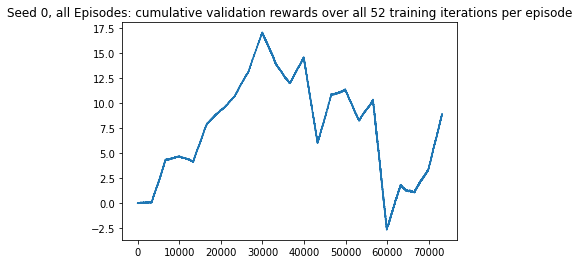

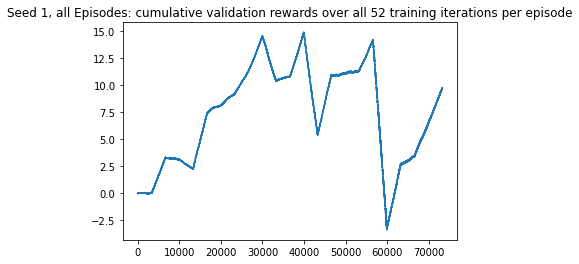

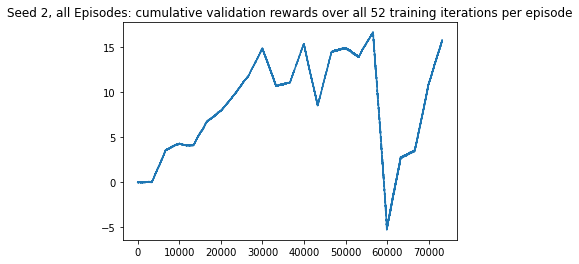

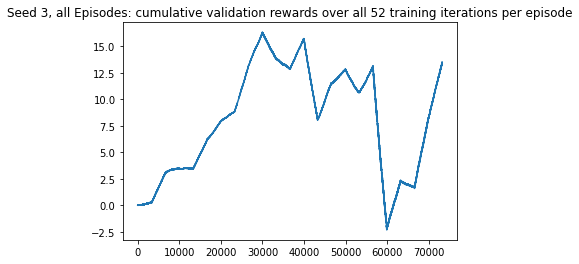

In [97]:
# one plot for each seed, all episodes combined, over all timesteps, cumulative reward on validation set
for seednum, seed in enumerate(seedlist):
    all_li = []
    for ep in range(1,23):
        li=[]
        for i in range(1,53):
            filepath = glob.glob(os.path.join(results_folder_path, seed, "rewards", f"*validation*ep{ep}_*er_{i}.csv"))[0]
            df = pd.read_csv(filepath, index_col=0)
            df.rename(columns={df.columns[1]: "reward"}, inplace=True)
            li.append(df)
        df = pd.concat(li, axis=0, ignore_index=True)
        df.rename(columns={df.columns[0]: "datadate"}, inplace=True)
        df["datadate"] = pd.to_datetime(df["datadate"], format='%Y%m%d')
        all_li.append(df)
    final_df = pd.concat(all_li, axis=0, ignore_index=True)
    plt.plot(final_df.index, final_df.reward.cumsum())
    plt.title(f"Seed {seednum}, all Episodes: cumulative validation rewards over all 52 training iterations per episode")
    plt.show()
    # TODO: need to have same axis and axis labels. make randomseed names as numbers (enumaerate)

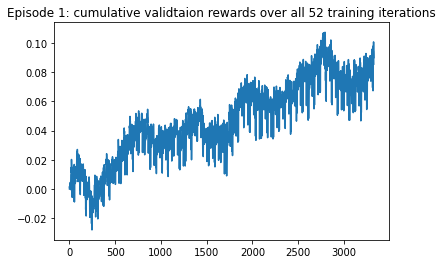

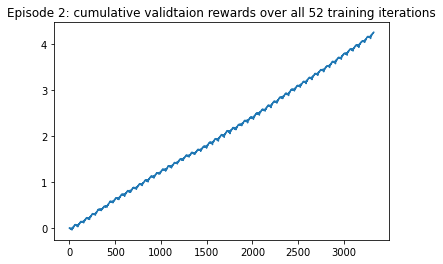

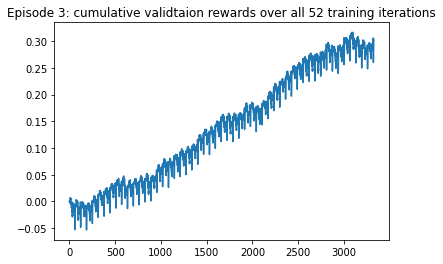

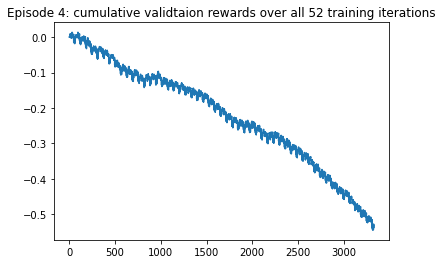

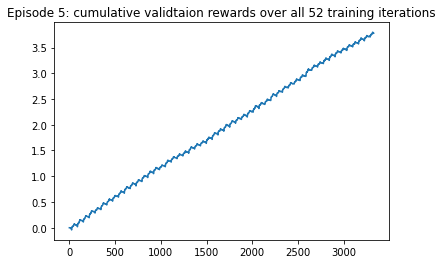

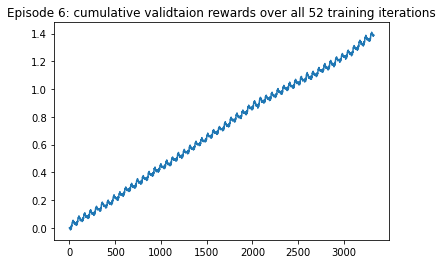

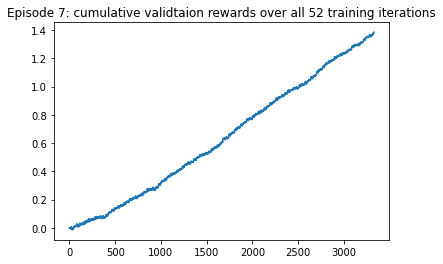

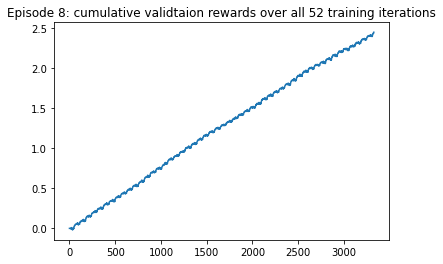

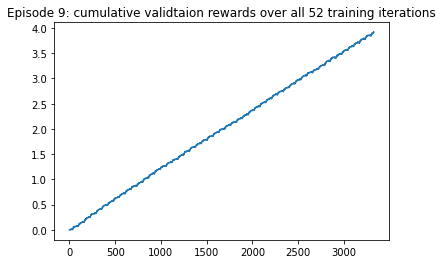

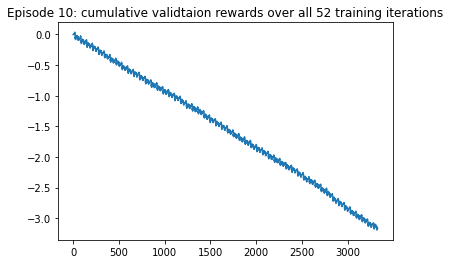

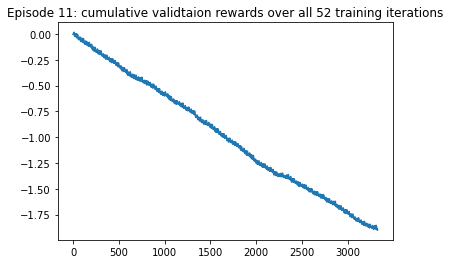

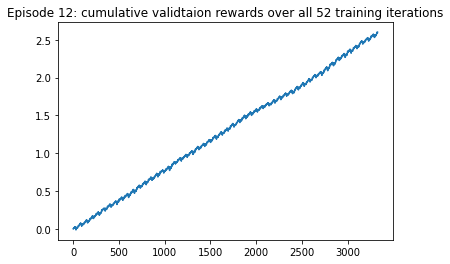

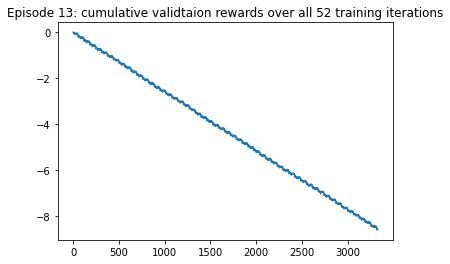

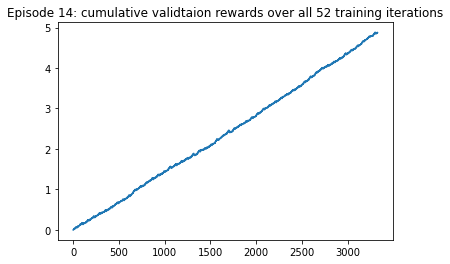

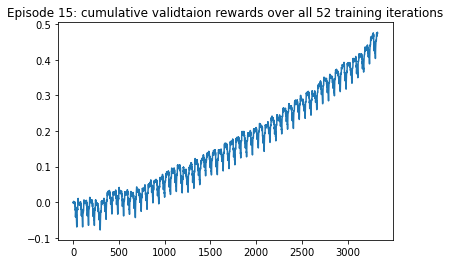

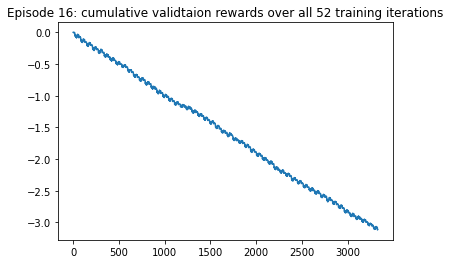

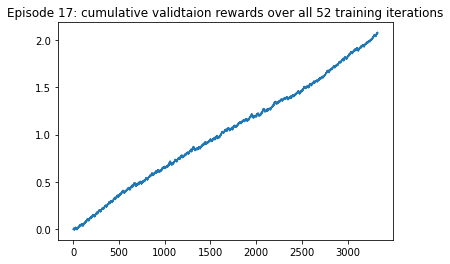

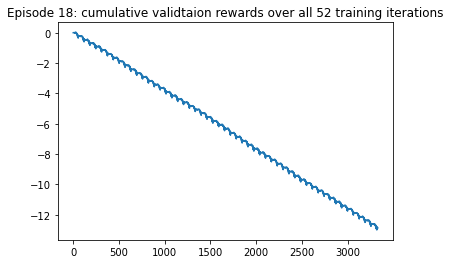

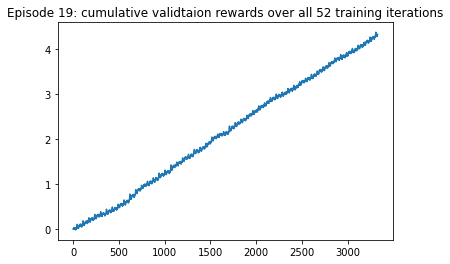

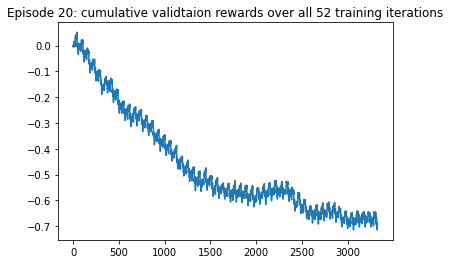

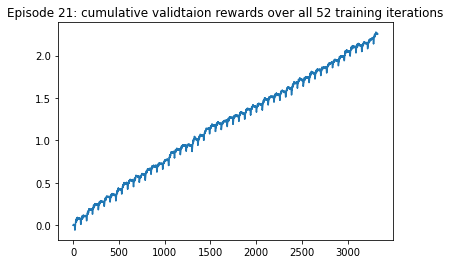

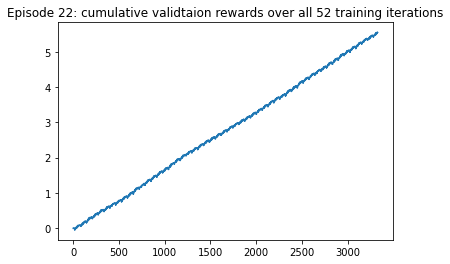

<Figure size 432x288 with 0 Axes>

In [91]:
# cum rewards fo rone seed over all timesteps but only 1 seed; we see that in certain episodes we
# are not getting better but worse
for ep in range(1,23):
    li=[]
    for i in range(1,53):
        filepath = glob.glob(os.path.join(results_folder_path, seed1, "rewards", f"*validation*ep{ep}_*er_{i}.csv"))[0]
        df = pd.read_csv(filepath, index_col=0)
        df.rename(columns={df.columns[1]: "reward"}, inplace=True)
        li.append(df)
    df = pd.concat(li, axis=0, ignore_index=True)
    df.rename(columns={df.columns[0]: "datadate"}, inplace=True)
    df["datadate"] = pd.to_datetime(df["datadate"], format='%Y%m%d')
    plt.plot(df.index, df.reward.cumsum())
    plt.title(f"Episode {ep}: cumulative validtaion rewards over all 52 training iterations")
    plt.show()
    plt.clf()

In [ ]:
### TRAINING PERFORMANCE

In [ ]:
# EXPLAINED VARIANCE (train set, over all training iterations)


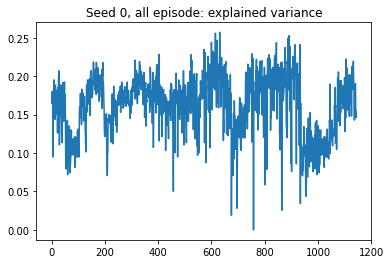

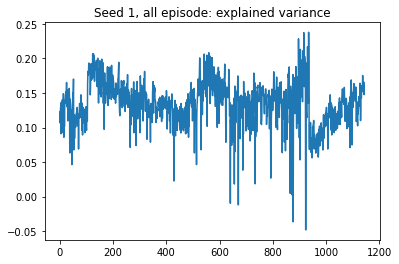

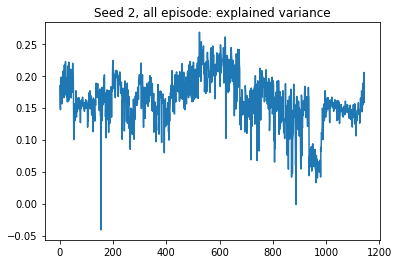

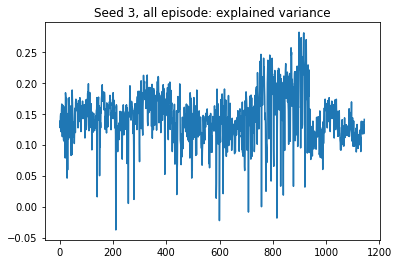

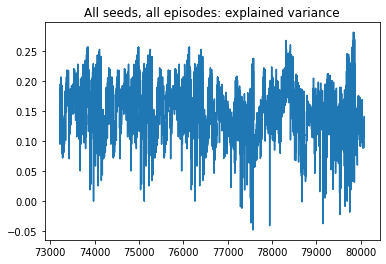

<Figure size 432x288 with 0 Axes>

In [102]:
# one plot for each seed, all episodes combined, over all timesteps, cumulative reward on validation set
for seednum, seed in enumerate(seedlist):
    li = []
    for ep in range(1,23):
        filepath = glob.glob(os.path.join(results_folder_path, seed, "training_performance", 
                                          f"explained_variance_*ep{ep}*.csv"))[0]
        df = pd.read_csv(filepath, index_col=0)
        df.rename(columns={df.columns[0]: "explained_variance"}, inplace=True)
        #plt.plot(final_df.index, final_df.explained_variance)
        #plt.title(f"Seed {seednum}, Episode {ep}: Explained Variance over training iterations")
        #plt.show()
        #plt.clf()
        li.append(df)
    df = pd.concat(li, axis=0, ignore_index=True)
    all_li.append(df)
    plt.plot(df.index, df.explained_variance)
    plt.title(f"Seed {seednum}, all episode: explained variance")
    plt.show()
    plt.clf()
    # TODO: need to have same axis and axis labels. make randomseed names as numbers (enumaerate)
    # note: ue episode name in different conext like this is wrong
final_df = pd.concat(all_li, axis=0, ignore_index=True)
plt.plot(final_df.index, final_df.explained_variance)
plt.title(f"All seeds, all episodes: explained variance")
plt.show()
plt.clf()

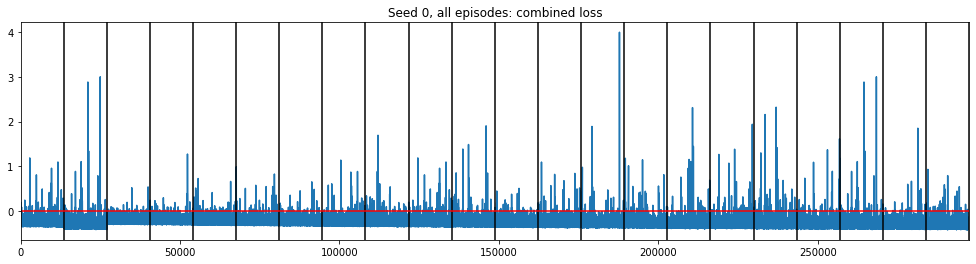

<Figure size 432x288 with 0 Axes>

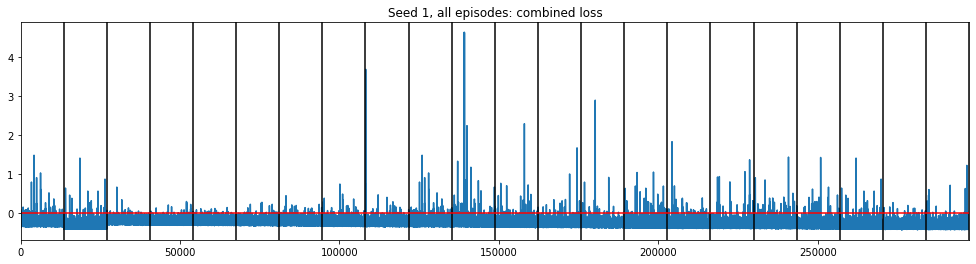

<Figure size 432x288 with 0 Axes>

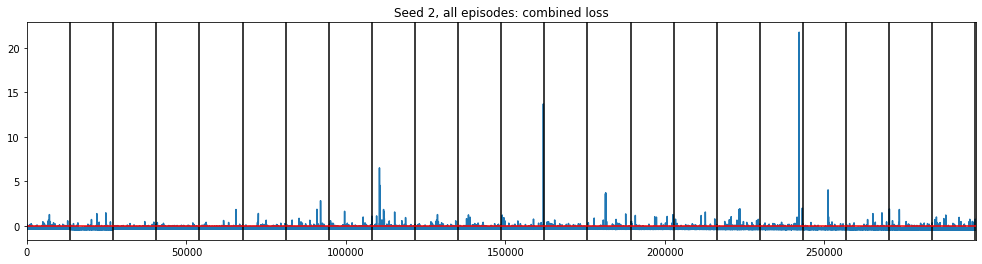

<Figure size 432x288 with 0 Axes>

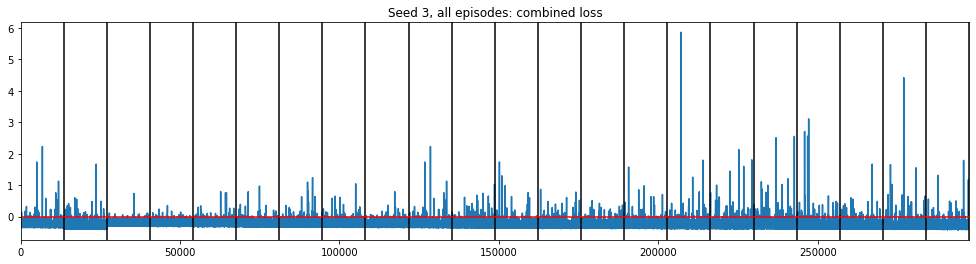

<Figure size 432x288 with 0 Axes>

In [123]:
### TRAIN PERFORMANCES: COMBINED LOSS
# one plot for each seed, all episodes combined, over all timesteps, cumulative reward on validation set
for seednum, seed in enumerate(seedlist):
    li = []
    for ep in range(1,23):
        filepath = glob.glob(os.path.join(results_folder_path, seed, "training_performance", 
                                          f"train_performances_ep{ep}*.csv"))[0]
        df = pd.read_csv(filepath, index_col=0)
        # plot
        #plt.plot(df.index, df.actor_loss)
        #plt.axvline(x=epwindow_end)
        #plt.title(f"Seed {seednum}, Episode {ep}: Explained Variance over training iterations")
        #plt.show()
        #plt.clf()
        li.append(df)
    epwindow_end = 0 
    df_all = pd.concat(li, axis=0, ignore_index=True)
    all_li.append(df)
    plt.figure(figsize=(17,4))
    plt.xlim(left=df_all.index[0], right=df_all.index[-1])
    plt.plot(df_all.index, df_all.combined_loss)
    for ep in range(1,23):
        epwindow_end += df.index[-1]
        plt.axvline(x=epwindow_end,  color='black')
    plt.axhline(y=0, color="r")
    plt.title(f"Seed {seednum+1}, all episodes: combined loss")
    plt.show()
    plt.clf()
    # TODO: need to have same axis and axis labels. make randomseed names as numbers (enumaerate)
    # note: ue episode name in different conext like this is wrong

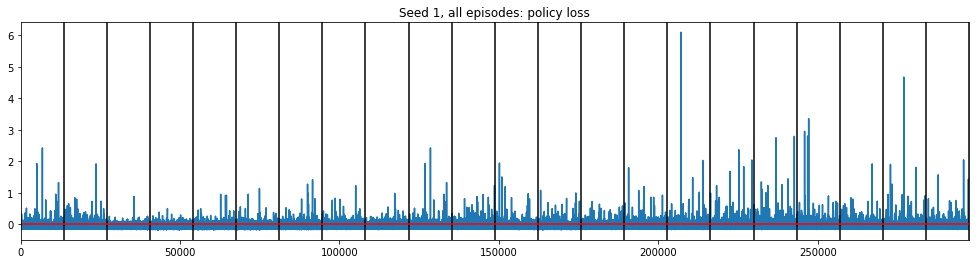

<Figure size 432x288 with 0 Axes>

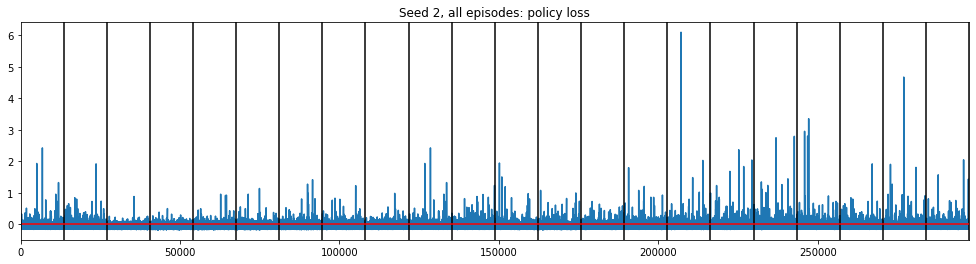

<Figure size 432x288 with 0 Axes>

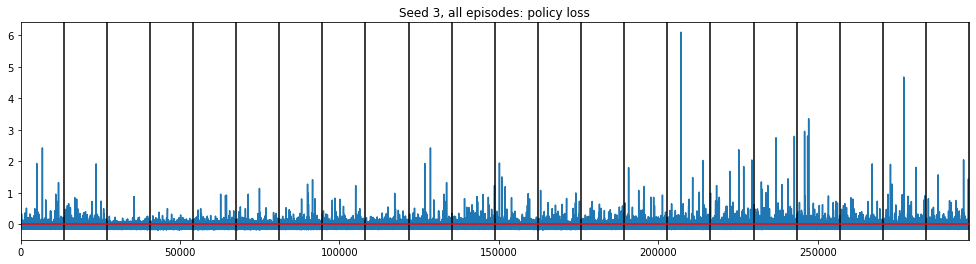

<Figure size 432x288 with 0 Axes>

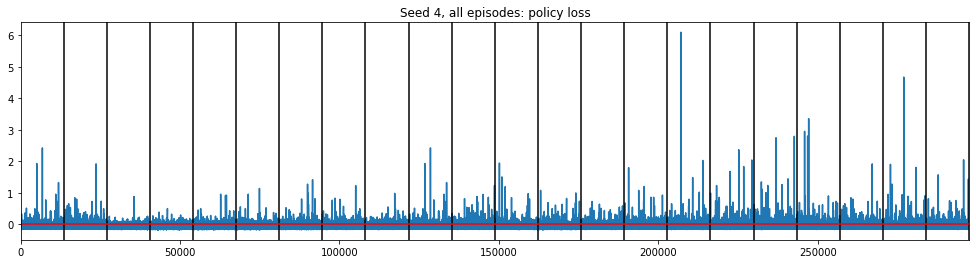

<Figure size 432x288 with 0 Axes>

In [124]:
### TRAIN PERFORMANCES: ACTOR LOSS (POLICY LOSS)
# one plot for each seed, all episodes combined, over all timesteps, cumulative reward on validation set
for seednum, seed in enumerate(seedlist):
    epwindow_end = 0 
    df_all = pd.concat(li, axis=0, ignore_index=True)
    all_li.append(df)
    plt.figure(figsize=(17,4))
    plt.xlim(left=df_all.index[0], right=df_all.index[-1])
    plt.plot(df_all.index, df_all.actor_loss)
    for ep in range(1,23):
        epwindow_end += df.index[-1]
        plt.axvline(x=epwindow_end,  color='black')
    plt.axhline(y=0, color="r")
    plt.title(f"Seed {seednum+1}, all episodes: policy loss")
    plt.show()
    plt.clf()
    # TODO: need to have same axis and axis labels. make randomseed names as numbers (enumaerate)
    # note: ue episode name in different conext like this is wrong

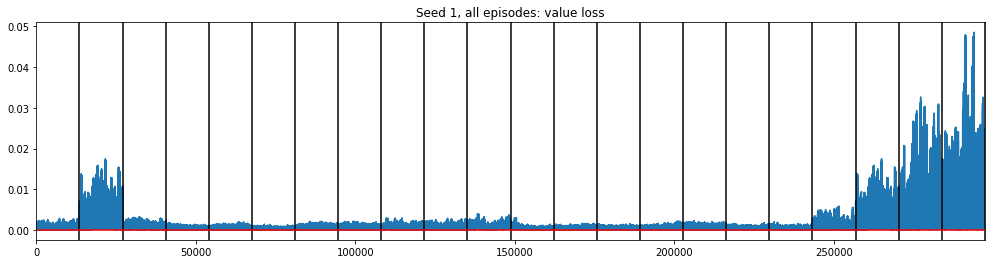

<Figure size 432x288 with 0 Axes>

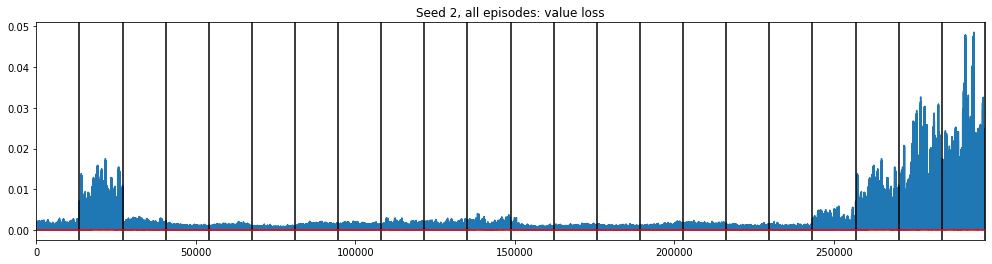

<Figure size 432x288 with 0 Axes>

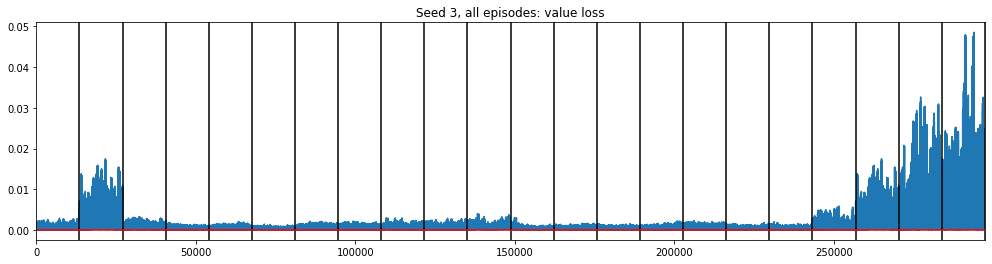

<Figure size 432x288 with 0 Axes>

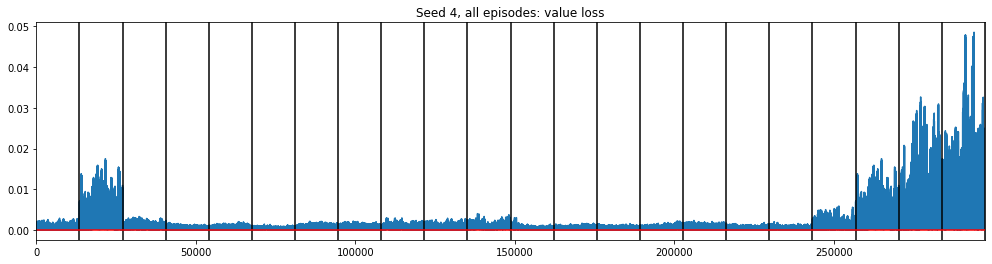

<Figure size 432x288 with 0 Axes>

In [125]:
### TRAIN PERFORMANCES: CRITIC LOSS (VALUE LOSS)
# one plot for each seed, all episodes combined, over all timesteps, cumulative reward on validation set
for seednum, seed in enumerate(seedlist):
    epwindow_end = 0 
    df_all = pd.concat(li, axis=0, ignore_index=True)
    all_li.append(df)
    plt.figure(figsize=(17,4))
    plt.xlim(left=df_all.index[0], right=df_all.index[-1])
    plt.plot(df_all.index, df_all.critic_loss)
    for ep in range(1,23):
        epwindow_end += df.index[-1]
        plt.axvline(x=epwindow_end,  color='black')
    plt.axhline(y=0, color="r")
    plt.title(f"Seed {seednum+1}, all episodes: value loss")
    plt.show()
    plt.clf()
    # TODO: need to have same axis and axis labels. make randomseed names as numbers (enumaerate)
    # note: ue episode name in different conext like this is wrong

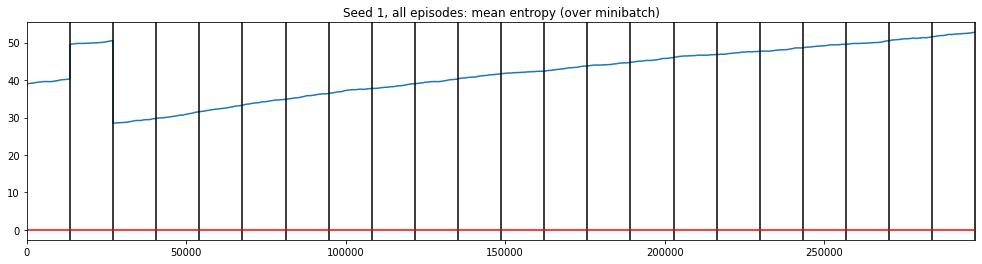

<Figure size 432x288 with 0 Axes>

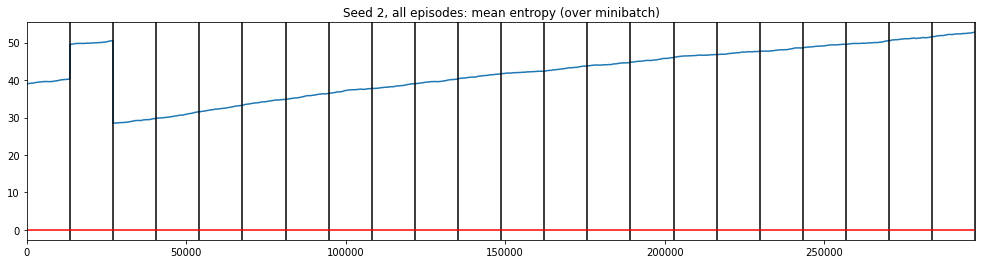

<Figure size 432x288 with 0 Axes>

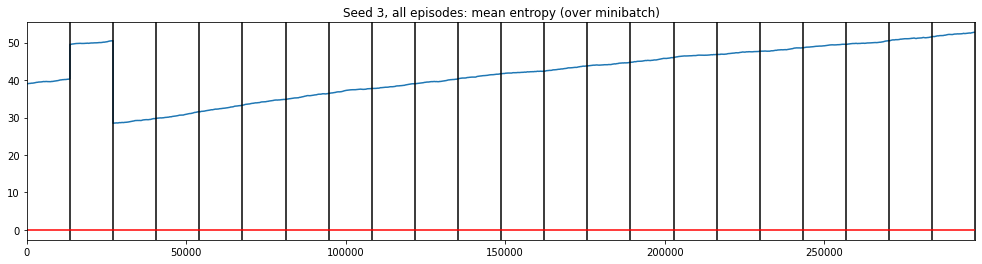

<Figure size 432x288 with 0 Axes>

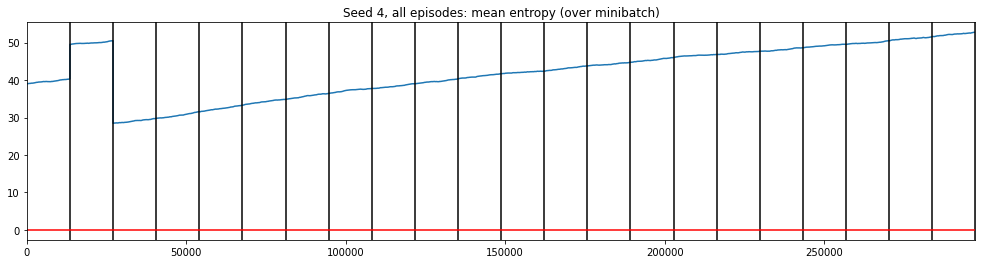

<Figure size 432x288 with 0 Axes>

In [127]:
### TRAIN PERFORMANCES: MEAN ENTROPY (-MEAN ENTROPY LOSS)
# one plot for each seed, all episodes combined, over all timesteps, cumulative reward on validation set
for seednum, seed in enumerate(seedlist):
    epwindow_end = 0 
    df_all = pd.concat(li, axis=0, ignore_index=True)
    all_li.append(df)
    plt.figure(figsize=(17,4))
    plt.xlim(left=df_all.index[0], right=df_all.index[-1])
    plt.plot(df_all.index, (-1)*df_all.entropy_loss)
    for ep in range(1,23):
        epwindow_end += df.index[-1]
        plt.axvline(x=epwindow_end,  color='black')
    plt.axhline(y=0, color="r")
    plt.title(f"Seed {seednum+1}, all episodes: mean entropy (over minibatch)")
    plt.show()
    plt.clf()
    # TODO: need to have same axis and axis labels. make randomseed names as numbers (enumaerate)
    # note: ue episode name in different conext like this is wrong
    
# entropy loss starts high at the beginning of each episode and then drops
# https://medium.com/aureliantactics/understanding-ppo-plots-in-tensorboard-cbc3199b9ba2
# shows how random actions are. Should decrease steadily during training process. Here looks ok.
# Entropy: "the higher the more bonus" => to max.
# Entropy loss = neg. Entropy => to min. => "the lower, the better"
# idea is that in the beginning, we get a bonus for more exploration

# about losses: 
# https://www.reddit.com/r/reinforcementlearning/comments/bse7l5/rl_ppo_alrorithm_understanding_value_loss_and/

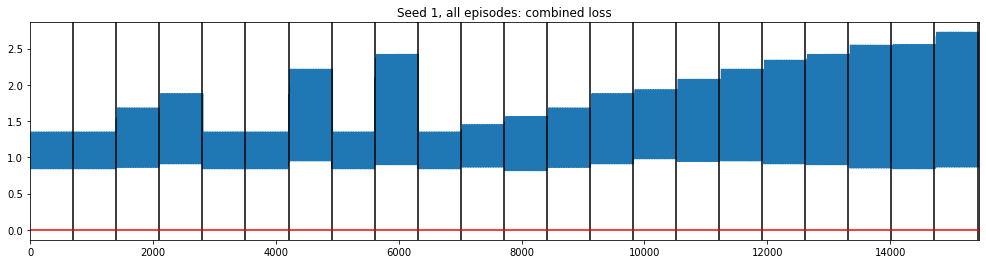

<Figure size 432x288 with 0 Axes>

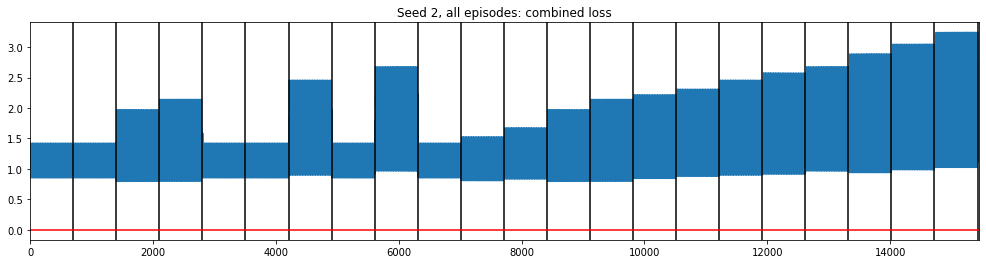

<Figure size 432x288 with 0 Axes>

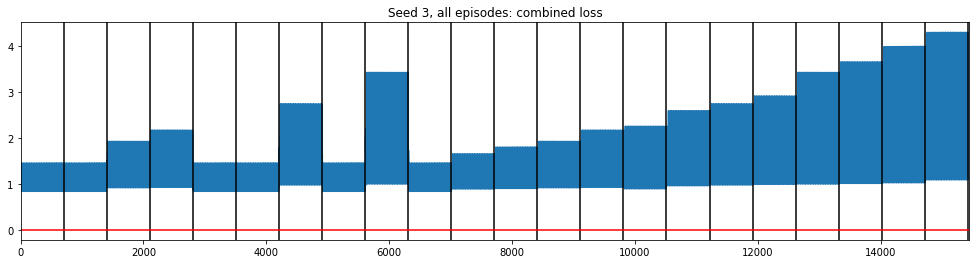

<Figure size 432x288 with 0 Axes>

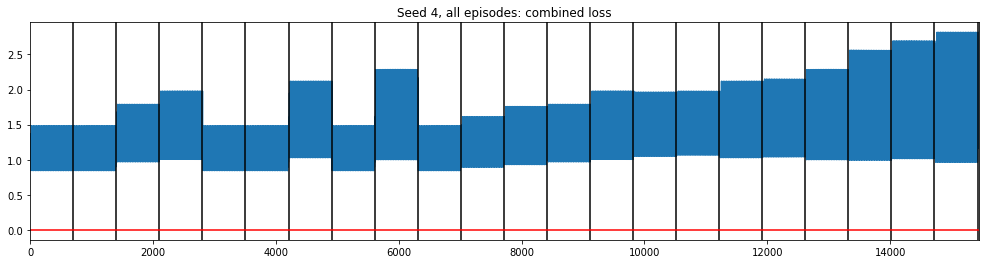

<Figure size 432x288 with 0 Axes>

In [128]:
### TRAIN PERFORMANCES: STANDARD DEVIATIONS
# one plot for each seed, all episodes combined, over all timesteps, cumulative reward on validation set
for seednum, seed in enumerate(seedlist):
    li = []
    for ep in range(1,23):
        filepath = glob.glob(os.path.join(results_folder_path, seed, "training_performance", 
                                          f"standard_deviations*{ep}*.csv"))[0]
        df = pd.read_csv(filepath, index_col=0)
        df.rename(columns={df.columns[0]: "standard_deviation"}, inplace=True)
        # plot
        #plt.plot(df.index, df.actor_loss)
        #plt.axvline(x=epwindow_end)
        #plt.title(f"Seed {seednum}, Episode {ep}: Explained Variance over training iterations")
        #plt.show()
        #plt.clf()
        li.append(df)
    epwindow_end = 0 
    df_all = pd.concat(li, axis=0, ignore_index=True)
    all_li.append(df)
    plt.figure(figsize=(17,4))
    plt.xlim(left=df_all.index[0], right=df_all.index[-1])
    plt.plot(df_all.index, df_all.standard_deviation)
    for ep in range(1,23):
        epwindow_end += df.index[-1]
        plt.axvline(x=epwindow_end,  color='black')
    plt.axhline(y=0, color="r")
    plt.title(f"Seed {seednum+1}, all episodes: combined loss")
    plt.show()
    plt.clf()
    # TODO: need to have same axis and axis labels. make randomseed names as numbers (enumaerate)
    # note: ue episode name in different conext like this is wrong